In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

class GetData:
    '''
    ----------------------------------------------------------------------
      
    provided methods:
        get_ticker_list()
        get_price_data()
        test_null()
        
    ----------------------------------------------------------------------
    '''
    
    def __init__(self, path):
        self.path = path

    def get_ticker_list(self):
        path_price = self.path/Path('FS_sp500_Value.csv')
        temp_df = pd.read_csv(path_price)
        list_ticker = sorted(list(set(temp_df['Ticker'].to_list())))

        return list_ticker
    
    def get_price_data(self, price_type, ticker_list=[], date_index=True, ignore_index=False, only_recent=False, recent_len=1):
        '''
        option:
            price_type: choose:"High", "Low", "Open", "Close", "Adj Close"
            ticker_list: input a list of ticker of stocks
            date_index: True => set date as index
            ignore_index: True => ignore original index
            only_recent: True => get newest price
            recent_len: number：　the number of newest price
        '''
        self.ticker_list = ticker_list
        path_price = self.path/Path('FS_sp500_Value.csv')
        dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
        combined_price = pd.read_csv(path_price, index_col='Date', parse_dates=['Date'], date_parser=dateparse) if date_index else pd.read_csv(path_price)
        df_price = pd.DataFrame({'Ticker':[] ,f'{price_type}': []})

        for symbol in self.ticker_list:
            temp_df = combined_price[combined_price.Ticker.str.fullmatch(symbol)].copy()
            if only_recent == True:
                df_price = pd.concat([df_price,temp_df.loc[temp_df.index[len(temp_df)-recent_len:], ['Ticker', f'{price_type}']]], ignore_index=ignore_index)
            else:
                df_price = pd.concat([df_price,temp_df.loc[:,['Ticker', f'{price_type}']]], ignore_index=ignore_index)
        return df_price
    

class Prep():
    
    @staticmethod
    def deal_null(input_data, fill=False, fill_method='ffill'):
        '''
        input_data : dataframe
        '''
        print(f'Now check if input data has null:')
        if isinstance(input_data, pd.DataFrame):
            for c in input_data.columns:
                print(f"    null rate of column——{c} :  {input_data.loc[:,c].isnull().sum()/len(input_data)}")
        elif isinstance(input_data, pd.Series):
            print(f"    null rate :  {input_data.isnull().sum()/len(input_data)}")
        if fill:
            if isinstance(fill_method, int):
                fill_na_data = input_data.fillna(fill_method)
            elif fill_method=="ffill" or fill_method=="bfill":
                fill_na_data = input_data.fillna(method=fill_method)
                
            return fill_na_data
        else:
            fill_na_data = input_data.dropna(axis=0)
            
            return fill_na_data
            
    @staticmethod
    def log_rolling(timeseries, period):
        '''
        log transform to make data has stationarity
        timeseriess: input a time-seires
        '''
        
        print(f'Now use log-transform on {timeseries.name} to make it has stationarity')
        fig, axes = plt.subplots(1,2)
        fig.set_size_inches(18, 10)
        log_timeseries = np.log(timeseries).rolling(period).mean()
        log_timeseries_std_dev = log_timeseries.rolling(period).std()
        axes[0].plot(timeseries, color='red', label="original")
        axes[0].legend(loc='best')
        axes[0].title.set_text('original timeseries')
        axes[1].plot(log_timeseries_std_dev, color ="blue", label = "std")
        axes[1].plot(log_timeseries, color="green", label = "log-roll")
        axes[1].title.set_text('Log-rolling timeseries')
        axes[1].legend(loc='best')
        plt.show()
        return log_timeseries

time: 583 ms (started: 2021-12-26 17:01:53 +00:00)


In [2]:
dataset_path = Path('./dataset')
prep = Prep()
get_data = GetData(dataset_path)
print(help(GetData))

Help on class GetData in module __main__:

class GetData(builtins.object)
 |  GetData(path)
 |  
 |  ----------------------------------------------------------------------
 |    
 |  provided methods:
 |      get_ticker_list()
 |      get_price_data()
 |      test_null()
 |      
 |  ----------------------------------------------------------------------
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_price_data(self, price_type, ticker_list=[], date_index=True, ignore_index=False, only_recent=False, recent_len=1)
 |      option:
 |          price_type: choose:"High", "Low", "Open", "Close", "Adj Close"
 |          ticker_list: input a list of ticker of stocks
 |          date_index: True => set date as index
 |          ignore_index: True => ignore original index
 |          only_recent: True => get newest price
 |          recent_len: number：　the number of newest price
 |  
 |  get_ticker_

In [3]:
t_list = get_data.get_ticker_list()
print(len(t_list), t_list)

505 ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR',

In [4]:
print(help(get_data.get_price_data))

# e.g.
test_get_price = get_data.get_price_data(price_type='High', ticker_list=['A','AAL', 'CCI'])
test_get_price_recent = get_data.get_price_data(price_type='High', ticker_list=['A','AAL', 'CCI'], only_recent=True, recent_len=10)
test_get_price_num_ind = get_data.get_price_data(price_type='High', ticker_list=['A','AAL', 'CCI'], date_index=False)
test_get_price_ignore_ind = get_data.get_price_data(price_type='High', ticker_list=['A','AAL', 'CCI'], ignore_index=True)

display(test_get_price, test_get_price_recent, test_get_price_num_ind, test_get_price_ignore_ind)

Help on method get_price_data in module __main__:

get_price_data(price_type, ticker_list=[], date_index=True, ignore_index=False, only_recent=False, recent_len=1) method of __main__.GetData instance
    option:
        price_type: choose:"High", "Low", "Open", "Close", "Adj Close"
        ticker_list: input a list of ticker of stocks
        date_index: True => set date as index
        ignore_index: True => ignore original index
        only_recent: True => get newest price
        recent_len: number：　the number of newest price

None


,Ticker,High
2009-12-31,A,22.725323
2010-01-04,A,22.625179
2010-01-05,A,22.331903
2010-01-06,A,22.174536
2010-01-07,A,22.045780
...,...,...
2021-06-08,CCI,199.000000
2021-06-09,CCI,198.070007
2021-06-10,CCI,200.470001
2021-06-11,CCI,198.919998


,Ticker,High
2021-06-01,A,140.320007
2021-06-02,A,138.220001
2021-06-03,A,136.910004
2021-06-04,A,138.410004
2021-06-07,A,138.580002
2021-06-08,A,138.919998
2021-06-09,A,140.369995
2021-06-10,A,143.350006
2021-06-11,A,143.600006
2021-06-14,A,143.850006


,Ticker,High
0,A,22.725323
1,A,22.625179
2,A,22.331903
3,A,22.174536
4,A,22.045780
...,...,...
232600,CCI,199.000000
232601,CCI,198.070007
232602,CCI,200.470001
232603,CCI,198.919998


,Ticker,High
0,A,22.725323
1,A,22.625179
2,A,22.331903
3,A,22.174536
4,A,22.045780
...,...,...
8641,CCI,199.000000
8642,CCI,198.070007
8643,CCI,200.470001
8644,CCI,198.919998


time: 25.7 s (started: 2021-12-26 17:01:54 +00:00)


In [6]:
# test if NaN exist
prep.deal_null(test_get_price)
prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv'))
prep.deal_null(test_get_price['High'])
drop_na_df = prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv'))
drop_na_s = prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv').loc[:,"Recent"])
fill_na_df = prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv'), fill=True)
fill_na_s = prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv').loc[:,"Recent"], fill=True)
fill_int_s = prep.deal_null(pd.read_csv('./dataset/FS_sp500_income.csv').loc[:,"Recent"], fill=True, fill_method=-1)
display(drop_na_df, drop_na_s, fill_na_df, fill_na_s, fill_int_s)

Now check if input data has null:
    null rate of column——Ticker :  0.0
    null rate of column——High :  0.0
Now check if input data has null:
    null rate of column——Unnamed: 0 :  0.0
    null rate of column——Ticker :  0.0
    null rate of column——Breakdown :  0.0
    null rate of column——Recent :  0.307
    null rate of column——Before_1 :  0.30372727272727273
    null rate of column——Before_2 :  0.30054545454545456
    null rate of column——Before_3 :  0.297
Now check if input data has null:
    null rate :  0.0
Now check if input data has null:
    null rate of column——Unnamed: 0 :  0.0
    null rate of column——Ticker :  0.0
    null rate of column——Breakdown :  0.0
    null rate of column——Recent :  0.307
    null rate of column——Before_1 :  0.30372727272727273
    null rate of column——Before_2 :  0.30054545454545456
    null rate of column——Before_3 :  0.297
Now check if input data has null:
    null rate :  0.307
Now check if input data has null:
    null rate of column——Unnamed

,Unnamed: 0,Ticker,Breakdown,Recent,Before_1,Before_2,Before_3
0,0,A,researchDevelopment,3.980000e+08,4.040000e+08,3.870000e+08,3.410000e+08
2,2,A,incomeBeforeTax,8.420000e+08,9.190000e+08,9.460000e+08,8.030000e+08
4,4,A,netIncome,7.190000e+08,1.071000e+09,3.160000e+08,6.840000e+08
5,5,A,sellingGeneralAdministrative,1.395000e+09,1.358000e+09,1.322000e+09,1.205000e+09
6,6,A,grossProfit,2.837000e+09,2.805000e+09,2.680000e+09,2.399000e+09
...,...,...,...,...,...,...,...
10994,10994,ZTS,totalOperatingExpenses,4.374000e+09,4.163000e+09,3.934000e+09,3.559000e+09
10995,10995,ZTS,costOfRevenue,2.038000e+09,1.915000e+09,1.903000e+09,1.761000e+09
10996,10996,ZTS,totalOtherIncomeExpenseNet,-3.050000e+08,-2.960000e+08,-2.010000e+08,-2.230000e+08
10998,10998,ZTS,netIncomeFromContinuingOps,1.636000e+09,1.500000e+09,1.424000e+09,8.620000e+08


0        3.980000e+08
2        8.420000e+08
4        7.190000e+08
5        1.395000e+09
6        2.837000e+09
             ...     
10994    4.374000e+09
10995    2.038000e+09
10996   -3.050000e+08
10998    1.636000e+09
10999    1.638000e+09
Name: Recent, Length: 7623, dtype: float64

,Unnamed: 0,Ticker,Breakdown,Recent,Before_1,Before_2,Before_3
0,0,A,researchDevelopment,3.980000e+08,4.040000e+08,3.870000e+08,3.410000e+08
1,1,A,effectOfAccountingCharges,3.980000e+08,4.040000e+08,3.870000e+08,3.410000e+08
2,2,A,incomeBeforeTax,8.420000e+08,9.190000e+08,9.460000e+08,8.030000e+08
3,3,A,minorityInterest,8.420000e+08,9.190000e+08,4.000000e+06,4.000000e+06
4,4,A,netIncome,7.190000e+08,1.071000e+09,3.160000e+08,6.840000e+08
...,...,...,...,...,...,...,...
10995,10995,ZTS,costOfRevenue,2.038000e+09,1.915000e+09,1.903000e+09,1.761000e+09
10996,10996,ZTS,totalOtherIncomeExpenseNet,-3.050000e+08,-2.960000e+08,-2.010000e+08,-2.230000e+08
10997,10997,ZTS,discontinuedOperations,-3.050000e+08,-2.960000e+08,-2.010000e+08,-2.230000e+08
10998,10998,ZTS,netIncomeFromContinuingOps,1.636000e+09,1.500000e+09,1.424000e+09,8.620000e+08


0        3.980000e+08
1        3.980000e+08
2        8.420000e+08
3        8.420000e+08
4        7.190000e+08
             ...     
10995    2.038000e+09
10996   -3.050000e+08
10997   -3.050000e+08
10998    1.636000e+09
10999    1.638000e+09
Name: Recent, Length: 11000, dtype: float64

0        3.980000e+08
1       -1.000000e+00
2        8.420000e+08
3       -1.000000e+00
4        7.190000e+08
             ...     
10995    2.038000e+09
10996   -3.050000e+08
10997   -1.000000e+00
10998    1.636000e+09
10999    1.638000e+09
Name: Recent, Length: 11000, dtype: float64

time: 64.1 ms (started: 2021-12-26 17:05:42 +00:00)


Now use log-transform on High to make it has stationarity


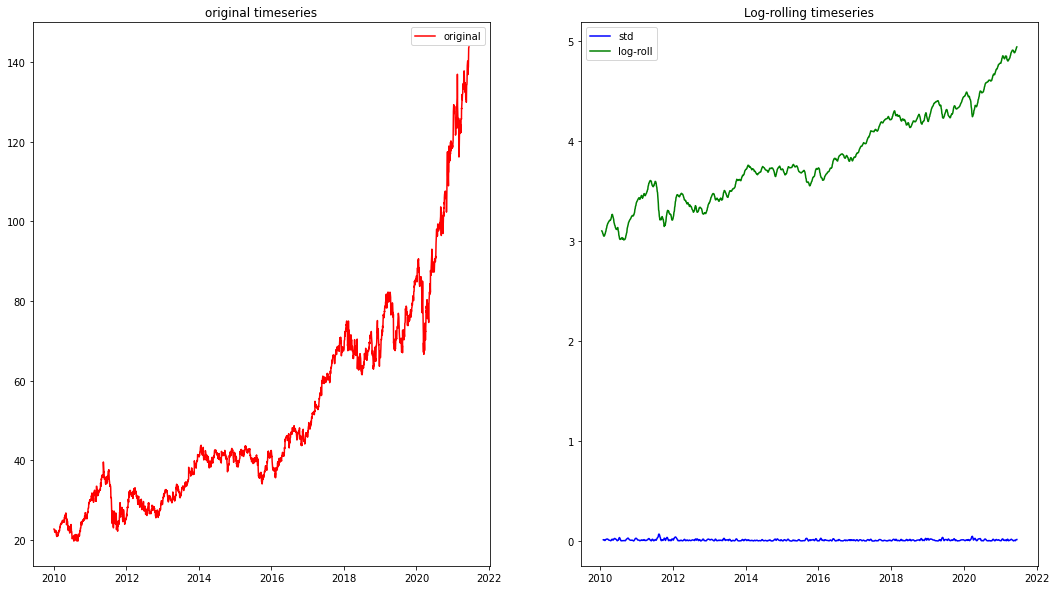

,Ticker,High
2009-12-31,A,22.725323
2010-01-04,A,22.625179
2010-01-05,A,22.331903
2010-01-06,A,22.174536
2010-01-07,A,22.045780
...,...,...
2021-06-08,A,138.919998
2021-06-09,A,140.369995
2021-06-10,A,143.350006
2021-06-11,A,143.600006


2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2021-06-08    4.923555
2021-06-09    4.927345
2021-06-10    4.932711
2021-06-11    4.937981
2021-06-14    4.941441
Name: High, Length: 2882, dtype: float64

time: 7.62 s (started: 2021-12-26 17:06:17 +00:00)


In [7]:
test_get_price = get_data.get_price_data(price_type='High', ticker_list=['A'])

prep = Prep()

log_price = prep.log_rolling(test_get_price['High'], 12)
display(test_get_price, log_price)